In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
results = pd.read_csv('./all-raw-optimal-results.csv')
results.head()

,Unnamed: 0,minority_size,tp,fp,tn,fn,tpr,tnr,roc_auc,geometric_mean,arithmetic_mean,f1_score,precision,layers,method,method_name
0,0,0.5,1317,5901,648144,12,0.990971,0.990978,0.998893,0.990974,0.990974,0.308178,0.182461,2,rus,rus_0pt00203_d2
1,1,0.5,1317,6013,648032,12,0.990971,0.990806,0.999005,0.990889,0.990889,0.304192,0.179673,2,rus,rus_0pt00203_d2
2,2,0.5,1317,7107,646938,12,0.990971,0.989134,0.998868,0.990052,0.990052,0.270071,0.156339,2,rus,rus_0pt00203_d2
3,3,0.5,1317,6780,647265,12,0.990971,0.989634,0.998906,0.990302,0.990302,0.279440,0.162653,2,rus,rus_0pt00203_d2
4,4,0.5,1317,8598,645447,12,0.990971,0.986854,0.998819,0.988910,0.988912,0.234258,0.132829,2,rus,rus_0pt00203_d2


In [4]:
d2_results = results.loc[results['layers'] == 2]

In [5]:
d2_results.shape

(527, 16)

In [6]:
minority_sizes = [
    0.00025, 0.0005, 0.001, 0.0025, 0.005, 0.0075, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9
]
minority_sizes = [round(size, 5) for size in minority_sizes]

In [15]:
plt.style.use(['seaborn-paper', 'ggplot', 'seaborn-whitegrid'])

In [16]:
d2_results.sort_values(by='minority_size', inplace=True)

/Users/jujohnson/anaconda3/envs/tf.latest/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Mean ROC AUC')

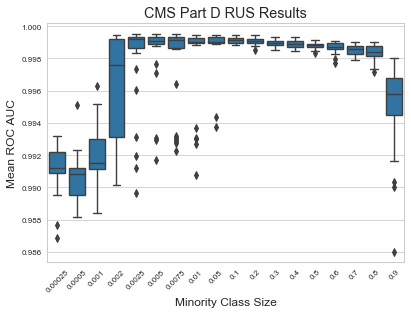

In [19]:
ax = sns.boxplot(data=d2_results, width=.8, x='minority_size', y='roc_auc', dodge=False, color='#1f77b4');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.title('CMS Part D RUS Results')
plt.xlabel('Minority Class Size')
plt.ylabel('Mean ROC AUC')

# iterate over boxes
# for i,box in enumerate(ax.artists):
#     box.set_edgecolor('black')
#     box.set_facecolor('white')

#     # iterate over whiskers and median lines
#     for j in range(6*i,6*(i+1)):
#          ax.lines[j].set_color('black')

In [13]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

Text(0, 0.5, 'Mean ROC AUC')

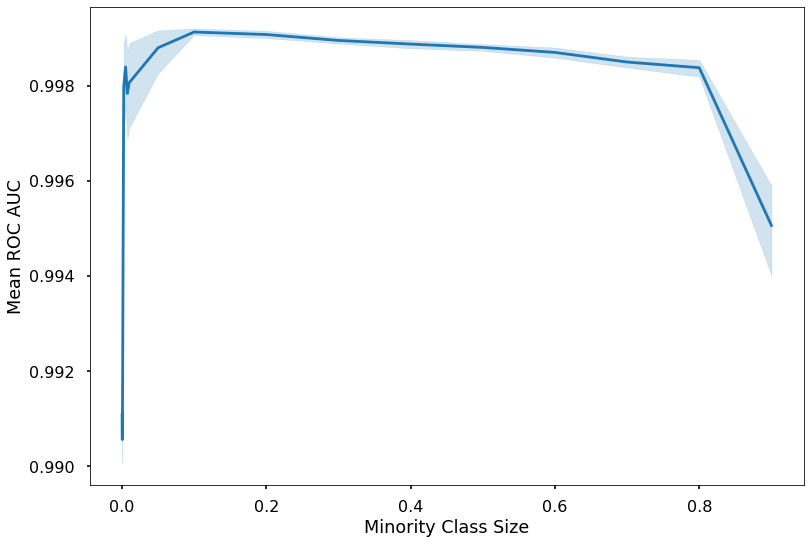

In [10]:
sns.lineplot(data=d2_results, x='minority_size', y='roc_auc')
plt.xlabel('Minority Class Size')
plt.ylabel('Mean ROC AUC')
# plt.xscale('log')